### Code alongs - MLP- Multilayered perceptron

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf  # la till denna för att kunna ladda ner datasetet.
from tensorflow.keras.datasets.mnist import load_data

tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)





In [5]:
x_train.shape

(60000, 28, 28)

7

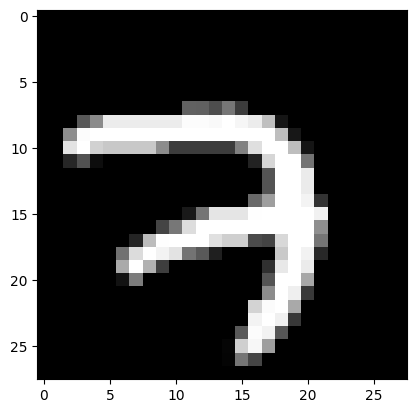

In [6]:
plt.imshow(x_train[5000], cmap="gray")
y_train[5000]

In [7]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
x_train[5000].shape

(28, 28)

In [9]:
# pixel intensity between 0 and 254 for this image

x_train[5000].min(), x_train[5000].max()

(0, 254)

In [10]:
# pixel value at row 10, col 5 for image 5000

x_train[5000,10,5]

199

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_train.shape, y_train.min(),y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

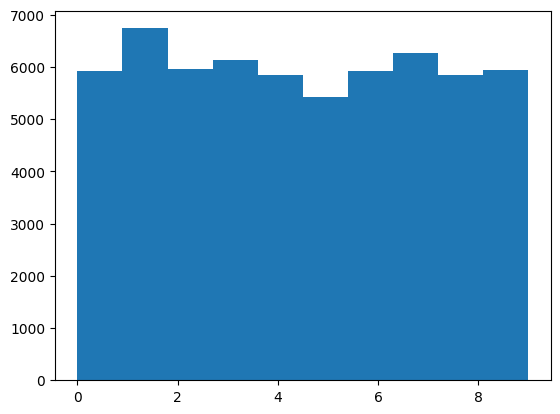

In [13]:
plt.hist(y_train)

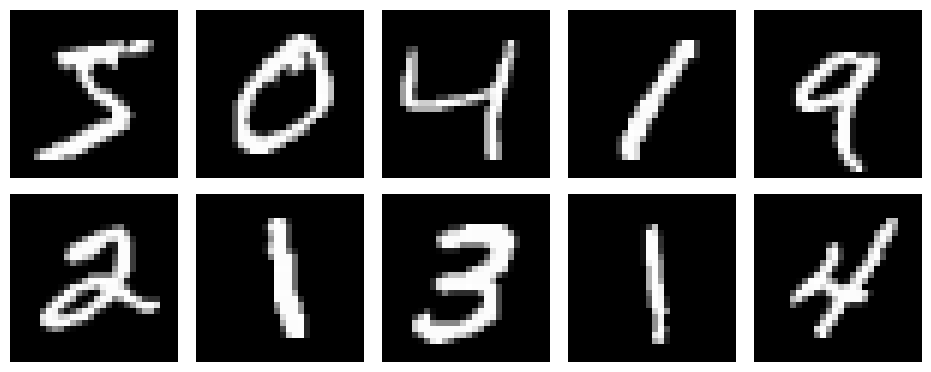

In [14]:
def display_images(data, n_rows = 2, n_cols =5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0,hspace=0.1, bottom=0)

display_images(x_train)

(10, 28, 28)

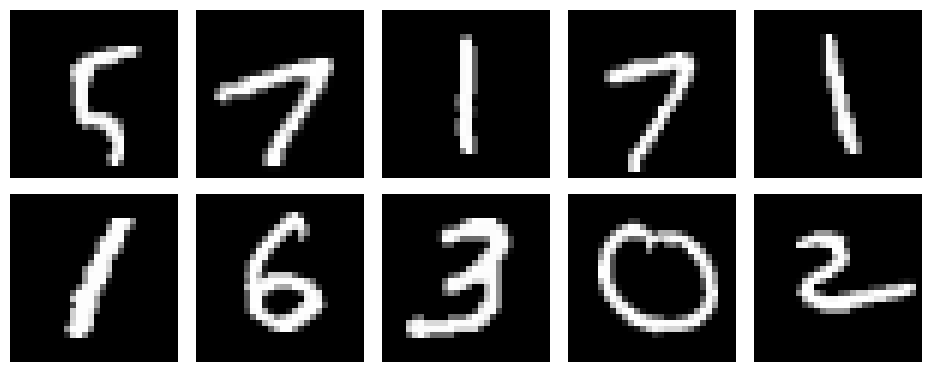

In [15]:
display_images(x_train[100:110])
x_train[100:110].shape

### Normalize data

In [16]:
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255

X_train.min(),X_train.max()

(0.0, 1.0)

In [17]:
X_train[5000].reshape(-1).shape

(784,)

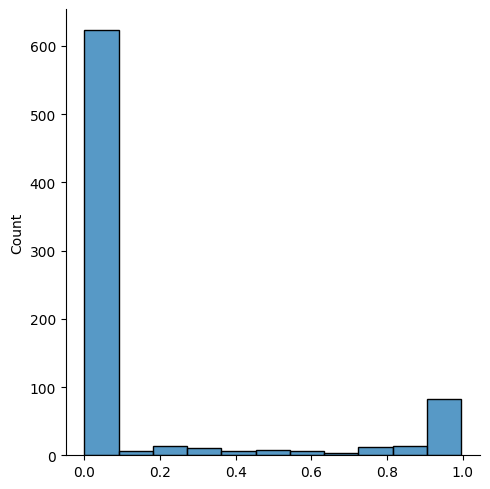

In [18]:
import seaborn as sns

sns.displot(data = X_train[5000].reshape(-1), kind="hist")

### MLP model 
- 10 output neurons/nodes(which represents 1,2,3,...9, our classes)
- softmax activation function in output layer -> probablities
- 784 neurons for input layer(28x28) -> use Flatten layer
- hidden layers -> Dense

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def mlp_model(
        neurons: tuple | list =  None,
        names: tuple | list = None,
        activations: tuple | list = [],
):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28,28), name="Input_layer"))

# hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))
    
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model

# naive because we don't have any hidden layers

model_naive = mlp_model(neurons=[10], names=["Output_layer"], activations=["softmax"])
model_naive.summary()

c:\Users\Carlos\Documents\github\AI-Carlos-hillgren-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_naive.fit(X_train, y_train, validation_split=1 /6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8022 - loss: 0.7646 - val_accuracy: 0.9152 - val_loss: 0.3092
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9122 - loss: 0.3216 - val_accuracy: 0.9220 - val_loss: 0.2810
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9187 - loss: 0.2953 - val_accuracy: 0.9256 - val_loss: 0.2675
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9222 - loss: 0.2794 - val_accuracy: 0.9295 - val_loss: 0.2648
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9240 - loss: 0.2735 - val_accuracy: 0.9282 - val_loss: 0.2623
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9256 - loss: 0.2687 - val_accuracy: 0.9301 - val_loss: 0.2593
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9278 - loss: 0.2610 - val_accuracy: 0.9329 - val_loss: 0.2530
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9276 - loss: 0.2512 - 

In [21]:
import pandas as pd

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.87058,0.499692,0.9152,0.309177
1,0.91220,0.316114,0.9220,0.280977
2,0.91804,0.292758,0.9256,0.267547
3,0.92156,0.280537,0.9295,0.264819
4,0.92322,0.273049,0.9282,0.262300


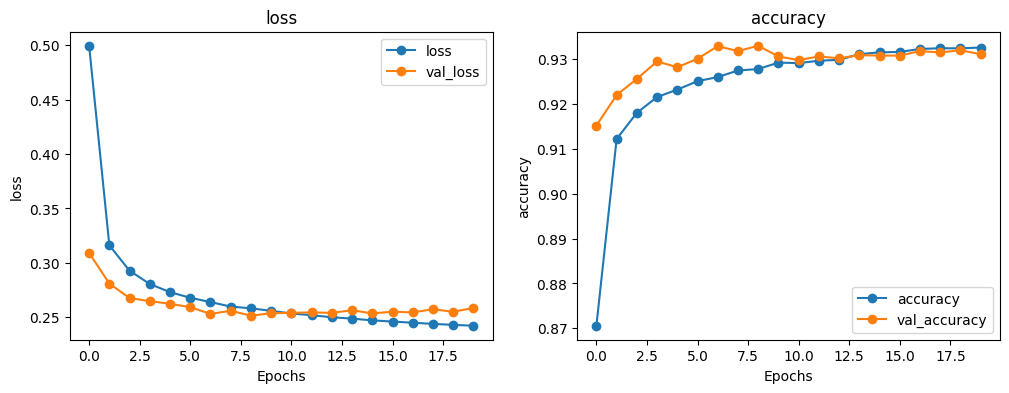

In [22]:
def plot_metrics(df_history,style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel = "Epochs",
            ylabel=metric[0],
            title=metric[0],
            ax=ax,
            style=style,
        )

plot_metrics(naive_history)

## Add hiddden layers

In [23]:
model_deep = mlp_model(
    neurons = [128, 128, 10],
    activations=["relu", "relu", "softmax"],
    names=["Hidden_1","hidden_2", "Output"],
)

model_deep.summary()


c:\Users\Carlos\Documents\github\AI-Carlos-hillgren-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_deep.fit(X_train, y_train, validation_split=1/6, epochs=20,verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8710 - loss: 0.4473 - val_accuracy: 0.9628 - val_loss: 0.1269
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9674 - loss: 0.1089 - val_accuracy: 0.9638 - val_loss: 0.1158
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9767 - loss: 0.0748 - val_accuracy: 0.9733 - val_loss: 0.0897
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9831 - loss: 0.0532 - val_accuracy: 0.9719 - val_loss: 0.0968
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9872 - loss: 0.0399 - val_accuracy: 0.9768 - val_loss: 0.0792
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9903 - loss: 0.0300 - val_accuracy: 0.9705 - val_loss: 0.1059
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9911 - loss: 0.0271 - val_accuracy: 0.9752 - val_loss: 0.0997
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9918 - loss: 0.0241 - 

In [25]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92544,0.255010,0.9628,0.126937
1,0.96764,0.106725,0.9638,0.115827
2,0.97662,0.075402,0.9733,0.089660
3,0.98144,0.057592,0.9719,0.096797
4,0.98560,0.044293,0.9768,0.079173


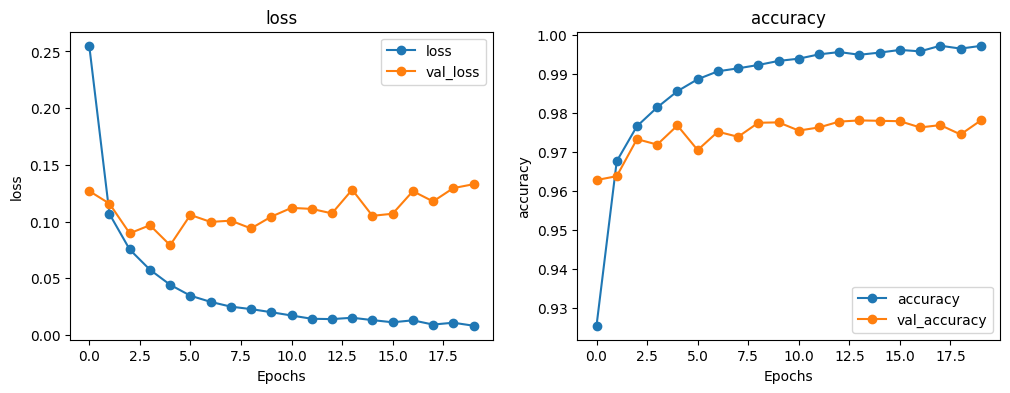

In [26]:
plot_metrics(deep_history)

In [27]:
# trains on all training data (60000)
model_deep.fit(X_train, y_train, epochs= 3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9919 - loss: 0.0328
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9969 - loss: 0.0105
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9968 - loss: 0.0109


### Prediction and evalution

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[5.8166997e-18, 1.9388637e-11, 4.4394951e-13, ..., 1.0000000e+00,
        7.5426481e-14, 3.0254840e-11],
       [6.0994436e-14, 4.7653138e-15, 1.0000000e+00, ..., 4.2973024e-14,
        2.0479872e-12, 6.4207305e-22],
       [7.0341488e-09, 9.9998701e-01, 2.2315297e-07, ..., 1.4777678e-06,
        1.1019024e-05, 4.6121523e-11],
       ...,
       [1.6495687e-25, 2.6604192e-18, 4.3364751e-27, ..., 3.6452283e-15,
        7.3540079e-18, 1.5047577e-12],
       [7.4354568e-15, 7.7167227e-20, 7.0101300e-17, ..., 9.1290936e-18,
        2.2894664e-09, 9.5633395e-18],
       [1.5996589e-17, 2.7947436e-23, 3.8380607e-22, ..., 1.8774544e-31,
        1.4144669e-22, 2.1492574e-21]], dtype=float32)

In [29]:
y_pred[1]

array([6.0994436e-14, 4.7653138e-15, 1.0000000e+00, 8.1256848e-11,
       5.5167699e-26, 1.7329104e-20, 1.0809448e-22, 4.2973024e-14,
       2.0479872e-12, 6.4207305e-22], dtype=float32)

In [30]:
y_test[1]

2

In [31]:
y_pred.shape

(10000, 10)

In [32]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



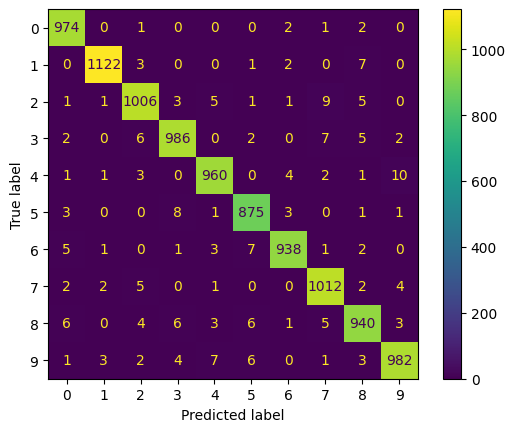

In [34]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Some missclassifications

In [35]:
(y_pred !=y_test).sum()

205

In [36]:
missclassified_indices = np.where(y_pred != y_test)[0]
missclassified_indices[:10]

array([104, 149, 247, 320, 321, 340, 381, 445, 447, 495], dtype=int64)

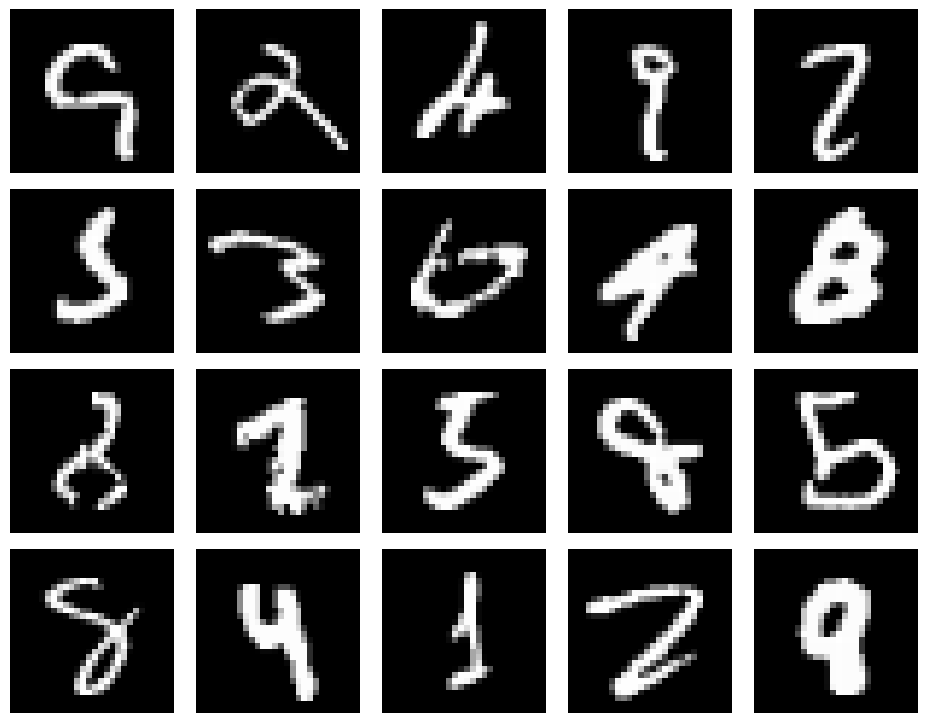

In [37]:
display_images(X_test[missclassified_indices], 4, 5, (12,8))